In [347]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv
import pandas as pd
from sklearn.model_selection import train_test_split

# (a)

In [332]:
A = np.array([[1,2,1,-1],[-1,1,0,2],[0,-1,-2,1]])
A

array([[ 1,  2,  1, -1],
       [-1,  1,  0,  2],
       [ 0, -1, -2,  1]])

In [333]:
b = np.array([3,2,-2]).reshape(3,1)
b

array([[ 3],
       [ 2],
       [-2]])

In [334]:
A_t = A.T
A_t

array([[ 1, -1,  0],
       [ 2,  1, -1],
       [ 1,  0, -2],
       [-1,  2,  1]])

In [335]:
x0 = np.array([1,1,1,1]).reshape(4,1)
x0

array([[1],
       [1],
       [1],
       [1]])

In [336]:
x1 = x0 - 0.1*(-A_t@b + A_t@A@x0 + 0.2*x0)
x1

array([[0.98],
       [0.98],
       [0.98],
       [0.98]])

In [337]:
f = 0.5*np.linalg.norm(A@x0 - b, ord=2)**2 + 0.1*np.linalg.norm(x0, ord=2)**2
f

0.4

In [338]:
def f(A,b,x):
    loss = 0.5*np.linalg.norm(A@x - b, ord=2)**2 + 0.1*np.linalg.norm(x, ord=2)**2
    return loss

In [339]:
f= f(A,b,x0)
f

0.4

In [340]:
def find_X(A, A_t, b, x0, alpha):
    X = []
    X.append(x0)
    x = x0
    k = 1
    while True:
        delta = -A_t@b + A_t@A@x + 0.2*x
        delta_2norm = np.linalg.norm(delta, ord=2)
        if delta_2norm < 0.001 or k >= 10000:
            break
        
        #X_ = x - 0.1*delta
        X_ = x - alpha*delta
        
        x = X_
        X.append(X_)
        k = k + 1
        
    return X
        
    

In [341]:
X = find_X(A, A_t, b, x0, 0.1)
#X

In [342]:
length = len(X)

for i in range(0,6):
    x = X[i].T[0]
    print("k={},    x(k)=[{},{},{},{}]".format(i,round(x[0],4) ,round(x[1],4), round(x[2],4), round(x[3],4)))
    

for j in range(length-5,length):
    x = X[j].T[0]
    print("k={},  x(k)=[{},{},{},{}]".format(j,round(x[0],4) ,round(x[1],4), round(x[2],4), round(x[3],4)))


k=227

k=0,    x(k)=[1,1,1,1]
k=1,    x(k)=[0.98,0.98,0.98,0.98]
k=2,    x(k)=[0.9624,0.9804,0.9744,0.9584]
k=3,    x(k)=[0.9427,0.9824,0.9668,0.9433]
k=4,    x(k)=[0.9234,0.9866,0.9598,0.9295]
k=5,    x(k)=[0.9044,0.9916,0.9526,0.9169]
k=272,  x(k)=[0.0666,1.3366,0.4928,0.3251]
k=273,  x(k)=[0.0666,1.3366,0.4928,0.325]
k=274,  x(k)=[0.0665,1.3366,0.4927,0.325]
k=275,  x(k)=[0.0664,1.3367,0.4927,0.3249]
k=276,  x(k)=[0.0663,1.3367,0.4927,0.3249]


In [395]:
def find_X(A, A_t, b, x0, alpha):
    X = []
    X.append(x0)
    x = x0
    k = 1
    while True:
        delta = -A_t@b + A_t@A@x + 0.2*x
        delta_2norm = np.linalg.norm(delta, ord=2)
        if delta_2norm < 0.001 or k >= 10000:
            break
        
        #X_ = x - 0.1*delta
        X_ = x - alpha*delta
        
        if X_[0] == float("inf"):
            break
        
        x = X_
        X.append(X_)
        k = k + 1
        
    return X

In [396]:
X = find_X(A, A_t, b, x0, 10)
X

/var/folders/ps/5d5cgvy91xv6hkty0gc2y0g00000gn/T/ipykernel_41396/1035185866.py:7: RuntimeWarning: overflow encountered in matmul
  delta = -A_t@b + A_t@A@x + 0.2*x


[array([[1],
        [1],
        [1],
        [1]]),
 array([[-1.],
        [-1.],
        [-1.],
        [-1.]]),
 array([[ 21.],
        [201.],
        [141.],
        [-19.]]),
 array([[ -4421.],
        [-18201.],
        [-15941.],
        [  8019.]]),
 array([[  674841.],
        [ 1872401.],
        [ 1825881.],
        [-1282039.]]),
 array([[-8.96156410e+07],
        [-2.06820401e+08],
        [-2.13225481e+08],
        [ 1.71950039e+08]]),
 array([[ 1.12408885e+10],
        [ 2.37607206e+10],
        [ 2.52019732e+10],
        [-2.16423901e+10]]),
 array([[-1.37495730e+12],
        [-2.78631567e+12],
        [-2.99741004e+12],
        [ 2.65107885e+12]]),
 array([[ 1.66243726e+14],
        [ 3.30122019e+14],
        [ 3.57602478e+14],
        [-3.20749987e+14]]),
 array([[-1.99908628e+16],
        [-3.93114794e+16],
        [-4.27275440e+16],
        [ 3.85823555e+16]]),
 array([[ 2.39766902e+18],
        [ 4.69283419e+18],
        [ 5.10894321e+18],
        [-4.62819068e+1

In [397]:
len(X)

150

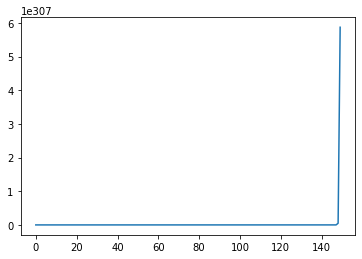

In [405]:
Delta = []
for x in X:
    delta = x - x_hat
    delta_2norm = np.linalg.norm(delta, ord=2) 
    Delta.append(delta_2norm)

k = np.arange(0,150)
plt.plot(k,Delta)
#plt.axhline(0.001, color = 'red')
plt.show()

# (d)

In [127]:
alphas = 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.1, 0.15

In [128]:
x_hat = inv(A_t@A + 0.2*np.identity(4))@A_t@b
x_hat

array([[0.06285483],
       [1.33819951],
       [0.49067315],
       [0.32238443]])

In [137]:
def find_delta(A, A_t, b, x0, x_hat, alpha):
    Delta_2norms = []
    X = find_X(A, A_t, b, x0, alpha)
    #print("len is {}\n".format(len(X)))
    for x in X:
        delta = x - x_hat
        delta_2norm = np.linalg.norm(delta, ord=2) 
        Delta_2norms.append(delta_2norm)
    del Delta_2norms[0] #delete k = 0, because we need to draw from k=1
    return Delta_2norms                

In [161]:
def graphs(A, A_t, b, x0, x_hat, alpha):
    Delta_2norms = find_delta(A, A_t, b, x0, x_hat, alpha)
    k = np.arange(1,len(Delta_2norms)+1)
        
    plt.subplot(3,3,i)
    plt.plot(k,Delta_2norms)
    plt.axhline(0.001, color = 'red')
    
    plt.xlabel("k")                                    
    plt.ylabel("Delta_2norm")
    plt.title("alpha="+str(alpha))
 

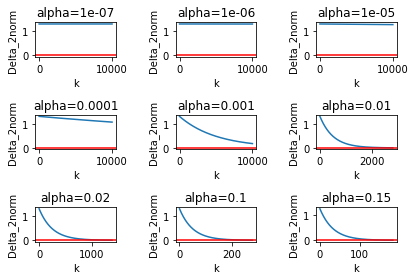

In [162]:
i = 1
for alpha in alphas:
    plt.subplot(3,3,i)
    graphs(A, A_t, b, x0, x_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()
    
   

Delta_2norms = find_delta(A, A_t, b, x0, x_hat, 10) 

Delta_2norms
#k = np.arange(1,len(Delta_2norms)+1)

#plt.plot(k,Delta_2norms)
#plt.axhline(0.001, color = 'red')
#plt.show()

### Comment on your results. What effect does changing the step-size have? What would you expect as you take the step-size to be increasingly large (α = 10 for example). 

Step size determines how much we will move in each step.

For example, if the step size is too small such as 1e-07, 1e-06, 1e-05, then the y(Delta_2norm) changes very slowly. So it's not cost-effective. And it will take a long time to find a global minimum.

In contrast, if the step size is too big such as 10, then it moves fast. 
But, it could pass the global minimum so that we cannot find the minimum point.

In conclusion, it is important to find proper alpha, so we could find the minimum point effectively.






Step size determines how much we will move in each step.
If the step size is too small, It moves very little in one step.
So y changes very slowly. 
For example, when alphas are 1e-07, 1e-06, 1e-05, it's hard to observe the change in the value of y.
The red lines are almost straight.
Thus, it's not cost-effective and it will take a long time to find a global minimum.

In contrast, if the step size is too big such as 10, then it moves fast. 
Hence, in the beginning, y will decrease quickly.
However, it will rapidly get bigger again as time goes and skip the global minimum.

In conclusion, it is important to find proper alpha which is not too big and not too small, so we could find the minimum point effectively.
For example, when alphas are 0.01, 0.02, 0.1, 0.15, y changes at an appropriate speed.
So we can observe that y converges to 0 from the graphs.

# (e)

We first need to preprocess the data. 
### 1. Remove all categorical features. 

In [348]:
data = pd.read_csv('CarSeats.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [349]:
categorical_predictors = ['ShelveLoc','Urban','US']
numerical_data = data.drop(categorical_predictors, axis=1)
numerical_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


In [350]:
numerical_data.mean()

Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [351]:
numerical_data.std()

Sales            2.824115
CompPrice       15.334512
Income          27.986037
Advertising      6.650364
Population     147.376436
Price           23.676664
Age             16.200297
Education        2.620528
dtype: float64

### 2. Then use sklearn.preprocessing.StandardScaler to standardize the remaining features. 

In [352]:
response = ['Sales']
predictors=[x for x in list(numerical_data.columns) if x not in response]
print(predictors)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [353]:
from sklearn.preprocessing import StandardScaler

In [354]:
# *******이거 잘한거 맞는지 체크하기
scaler = StandardScaler()
numerical_data[predictors] = scaler.fit_transform(numerical_data[predictors])
numerical_data[predictors]

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953


### 3. Print out the mean and variance of each of the standardized features. 

In [198]:
numerical_data[predictors].mean()

CompPrice      3.483325e-16
Income         5.162537e-17
Advertising   -6.161738e-17
Population     1.454392e-16
Price         -6.994405e-17
Age            1.786071e-16
Education     -2.534084e-16
dtype: float64

In [199]:
numerical_data[predictors].std()

CompPrice      1.001252
Income         1.001252
Advertising    1.001252
Population     1.001252
Price          1.001252
Age            1.001252
Education      1.001252
dtype: float64

In [343]:
numerical_data[predictors].var()

CompPrice      1.002506
Income         1.002506
Advertising    1.002506
Population     1.002506
Price          1.002506
Age            1.002506
Education      1.002506
dtype: float64

### 4. Next, center the target variable (sub- tract its mean).

In [355]:
target_mean = numerical_data[response].mean()
numerical_data[response] = numerical_data[response]-target_mean
numerical_data[response].head()

,Sales
0,2.003675
1,3.723675
2,2.563675
3,-0.096325
4,-3.346325


In [203]:
numerical_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,2.003675,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,3.723675,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,2.563675,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.096325,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,-3.346325,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...,...
395,5.073675,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208
396,-1.356325,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033
397,-0.086325,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529
398,-1.556325,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953


### 5. Finally, create a training set from the first half of the resulting dataset, and a test set from the remaining half and call these objects X train, X test, Y train and Y test.

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(numerical_data.iloc[:,1:], numerical_data.iloc[:,0], test_size=0.5, shuffle=False)

### 6. Print out the first and last rows of each of these.

In [206]:
X_train.head(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449


In [207]:
X_train.tail(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
199,-0.19425,0.692014,-0.246159,0.476656,0.431555,0.659918,0.038208


In [208]:
X_test.head(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
200,1.242219,0.835121,-0.998939,0.57177,1.277326,0.536309,-0.725953


In [209]:
X_test.tail(1)

,CompPrice,Income,Advertising,Population,Price,Age,Education
399,0.589279,-1.132606,-0.998939,-1.615848,0.177823,-0.26715,0.802369


In [210]:
Y_train.head(1)

0    2.003675
Name: Sales, dtype: float64

In [211]:
Y_train.tail(1)

199   -1.076325
Name: Sales, dtype: float64

In [212]:
Y_test.head(1)

200   -1.936325
Name: Sales, dtype: float64

In [213]:
Y_test.tail(1)

399    2.213675
Name: Sales, dtype: float64

What to submit: a print out of the means and variances of features, a print out of the first and last rows of the 4 requested objects, and some commentary. Include a screen shot of any code used for this section and a copy of your python code in solutions.py.

# (g)

In [357]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...
195,-0.520720,0.870898,-0.396715,1.054133,-0.160485,0.783527,-1.108033
196,0.328103,-1.454597,-0.095603,0.986194,0.727575,1.154355,0.802369
197,-0.063662,-0.273961,-0.998939,0.463068,0.939018,1.401573,0.802369
198,-0.847190,0.405799,-0.246159,1.597640,0.516132,0.968941,-1.490113


In [358]:
X_t = X_train.T
X_t

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
CompPrice,0.850455,-0.912484,-0.781896,-0.520720,1.046337,-0.063662,-0.651308,0.719867,0.458691,0.458691,...,0.328103,2.025748,-1.108366,0.915749,-0.847190,-0.520720,0.328103,-0.063662,-0.847190,-0.194250
Income,0.155361,-0.739060,-1.204159,1.121336,-0.166631,1.586435,1.300220,0.441576,1.479105,1.586435,...,-1.132606,-0.953721,-1.526151,0.048030,1.049782,0.870898,-1.454597,-0.273961,0.405799,0.692014
Advertising,0.657177,1.409957,0.506621,-0.396715,-0.547271,0.958289,-0.998939,1.259401,-0.998939,-0.998939,...,0.958289,0.958289,-0.998939,0.054953,1.711069,-0.396715,-0.095603,-0.998939,-0.246159,-0.246159
Population,0.075819,-0.032882,0.028262,1.366649,0.510625,1.604434,-1.493558,1.088102,-1.065546,-0.909288,...,0.218490,-0.644328,0.972607,-1.316919,1.468557,1.054133,0.986194,0.463068,1.597640,0.476656
Price,0.177823,-1.386854,-1.513719,-0.794814,0.516132,-1.852028,-0.329639,0.177823,0.346978,0.346978,...,-0.625659,2.419118,-0.963968,-0.837102,0.516132,-0.160485,0.727575,0.939018,0.516132,0.431555
Age,-0.699782,0.721723,0.350895,0.103677,-0.947000,1.525182,1.092550,0.845332,1.401573,1.401573,...,-1.008805,1.277964,0.165482,0.474505,-0.514369,0.783527,1.154355,1.401573,0.968941,0.659918
Education,1.184449,-1.490113,-0.725953,0.038208,-0.343872,0.802369,0.420288,-1.490113,-1.490113,1.184449,...,-0.343872,0.038208,0.038208,-1.490113,-1.108033,-1.108033,0.802369,0.802369,-1.490113,0.038208


In [359]:
Y_train

0      2.003675
1      3.723675
2      2.563675
3     -0.096325
4     -3.346325
         ...   
195   -3.306325
196   -3.396325
197   -4.976325
198   -3.876325
199   -1.076325
Name: Sales, Length: 200, dtype: float64

In [360]:
B_ridge = inv(X_t@X_train + 0.5*np.identity(7))@X_t@Y_train
B_ridge

0    1.674911
1    0.368707
2    1.109761
3    0.020805
4   -2.321392
5   -0.519396
6   -0.149282
dtype: float64

# (i)

In [361]:
B0 = pd.DataFrame({'CompPrice':[1],
                    'Income':[1],
                    'Advertising':[1],
                    'Population':[1],
                    'Price':[1],
                    'Age':[1],
                    'Education':[1]   
                  })
B0

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1,1,1,1,1,1,1


In [362]:
b0 = B0.values.reshape(7,1)
#b0

In [363]:
x = X_train.values.reshape(200,7)
#x

In [364]:
x_t = x.T.reshape(7,200)
#x_t

In [365]:
y = Y_train.values.reshape(200,1)
#y

In [366]:
loss_hat = np.linalg.norm(y - x@B_ridge, ord = 2 )**2/200 + 0.5*np.linalg.norm(B_ridge, ord = 2 )**2
loss_hat

1732.27024094426

In [367]:
alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]

In [368]:
def loss_function(y, x, B):
    loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2
    return loss

In [369]:
def find_beta(b0, x, y, x_t,alpha):
    b = b0
    Betas = []
    Betas.append(b)
    for k in range(1, 1001):
        B = b - alpha*(-2*x_t@(y-x@b) + 200*b)/200
        b = B
        Betas.append(B)
        
    return Betas    

In [370]:
def find_delta(b0, x, y, x_t,loss_hat,alpha):
    Deltas = []
    Betas = find_beta(b0, x, y, x_t,alpha)
    
    for B in Betas:        
        loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2     
        delta = loss - loss_hat
        Deltas.append(delta)
    return Deltas

In [371]:
def ridge_graph(b0, x, y, x_t, loss_hat, alpha):
    deltas = find_delta(b0, x, y, x_t, loss_hat, alpha)
    k = np.arange(0,len(deltas)) 
    
    plt.plot(k, deltas, color='blue')      
    plt.xlabel("k")                                    
    plt.ylabel("Delta")
    plt.title("alpha="+str(alpha),pad=15)
    #plt.title('Graph Title', loc='right', pad=1)

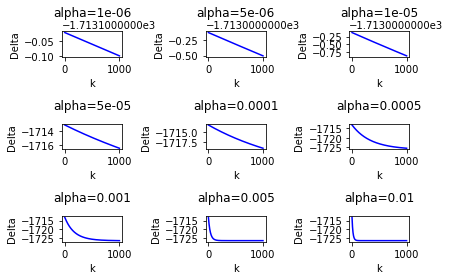

In [290]:
i = 1
for alpha in alphas:
    plt.subplot(3,3,i)
    ridge_graph(b0, x, y, x_t, loss_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()

### State which step-size you think is best

The best alpha is 0.01. 

Because, from above graph, we can found that when alpha is 0.01, delta converge to zero fastest. 


###  and let β(K) denote the estimator achieved when running GD with that choice of step size. Report the train MSE, test MSE

In [372]:
Betas = find_beta(b0, x, y, x_t,0.01)

In [374]:
len(Betas)

1001

In [378]:
B = Betas[1000]
B

array([[ 0.680673  ],
       [ 0.28229334],
       [ 0.65157017],
       [ 0.00834835],
       [-1.17129532],
       [-0.400892  ],
       [-0.10063355]])

In [379]:
train_mse = (np.linalg.norm(y - x@B , ord = 2)**2)/200
train_mse

4.558906724365393

In [380]:
y_ts = Y_test.values.reshape(200,1)
x_ts= X_test.values.reshape(200,7)

In [381]:
test_mse = (np.linalg.norm(y_ts - x_ts@B , ord = 2)**2)/200
test_mse

4.38042918327184

In [382]:
print("The train MSE is {}".format(train_mse))
print("The test MSE is {}".format(test_mse))

The train MSE is 4.558906724365393
The test MSE is 4.38042918327184


# (j)

In [ ]:
sgd_alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.006, 0.02]

In [314]:
def sgd_betas(b0, X_train,Y_train, alpha):
    b = b0
    sgd_B = []
    sgd_B.append(b)
    for i in range(1,1001):
        i = i % 200
        if i == 0:
            i = 200
        X = X_train.loc[i-1]
        Y = Y_train.loc[i-1]
    
        x = X.values.reshape(7,1)
        x_t = x.T 
    
        B = b - alpha*(-2*x@(Y-x_t@b)+b)
        sgd_B.append(B)
        b = B
    return sgd_B

In [320]:
def sgd_deltas(b0, X_train, Y_train, loss_hat, alpha):
    y = Y_train.values.reshape(200,1)
    x = X_train.values
    sgd_del = []
    sgd_B = sgd_betas(b0, X_train,Y_train, alpha)
    for B in sgd_B:
        loss = np.linalg.norm(y - x@B, ord = 2 )**2/200 + 0.5*np.linalg.norm(B, ord = 2 )**2
        delta = loss - loss_hat
        sgd_del.append(delta)
    return sgd_del   

In [329]:
def sgd_graph(b0, X_train, Y_train, loss_hat, alpha):
    sgd_Delta = sgd_deltas(b0, X_train, Y_train, loss_hat, alpha)
    k = np.arange(0,len(sgd_Delta)) 
    

    plt.plot(k, sgd_Delta, color='blue')      
    plt.xlabel("k")                                    
    plt.ylabel("sgd_Delta")
    plt.title("alpha="+str(alpha),pad=15)

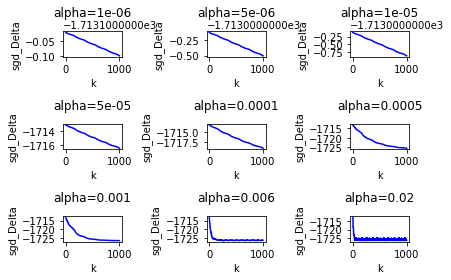

In [330]:
i = 1
for alpha in sgd_alphas:
    plt.subplot(3,3,i)
    sgd_graph(b0, X_train, Y_train, loss_hat, alpha)
    i = i + 1

plt.tight_layout()
plt.show()

### Report the best step-size choice and the corresponding train and test MSEs.
### ****** mse계산하기!!!

The best alpha is 0.006.
Because, when alpha is 0.006, y converges to zero at a high speed.
So it is cost-effective. And it is more stable than when alpha is 0.02.
When alpha is 0.02, y goes up and down.
In other words, the B is closed to B_hat and it far away from the B_hat again.


From the above, y converges to zero at a high speed when alpha are 0.006 and 0.02.
However, it is not stable when the alpha is 0.02. 
Because y goes up and down.
This shows that B is getting closed to B_hat and it again far away from the B_hat.
So this is not cost-effective.
Whereas, when alpha is 0.006, it goes to zero fast and is relatively more stable than when alpha is 0.02.
Thus, we conclude that 0.006 is the best alpha(step-size).

###  In some cases you might observe that the value of ∆(k) jumps up and down, and this is not something you would have seen using batch GD. Why do you think this might be happening?

BGD decide the direction that minimize the sum of all loss functions.

Whereas, SGD decide the dircetion that minimize each loss function.
For example, when we calculate SGD derivative we use only one row of x
whereas, we use all rows of X, when we do BGD.
Thus, the direction is changed during an each step and this let delta(k) jumps up and down.

In [383]:
sgd_B =sgd_betas(b0, X_train,Y_train, 0.006)
print(len(sgd_B))

1001


In [385]:
B_ = sgd_B[1000]
B_

array([[ 0.49915986],
       [ 0.26437122],
       [ 0.64521676],
       [-0.16999595],
       [-1.36299439],
       [-0.29527704],
       [-0.17905282]])

In [386]:
train_mse = (np.linalg.norm(y - x@B_ , ord = 2)**2)/200
test_mse = (np.linalg.norm(y_ts - x_ts@B_ , ord = 2)**2)/200

In [387]:
print("The train MSE is {}".format(train_mse))
print("The test MSE is {}".format(test_mse))

The train MSE is 4.661749176041872
The test MSE is 4.447228989660328


# (k)

###  Based on your GD and SGD results, which algorithm do you prefer?

GD is preferable. Because the optimal stepsize for GD is 0.01 and for SGD is 0.006.

0.01 is greater than 0.006 which means 0.01 moves faster than 0.006.
Thus, 0.01 converges to zero faster than 0.006.

***************************
이거 다시 생각해봐야함. 대충한거임

The train MSE and test MSE for GD are 4.559 and 4.380.
And the train MSE and test MSE for SGD are 4.662 and 4.447.
We can see that MSE for GD are slightly less than the SGD.
However, even if GD's MSE are better than the SGD, SGD is much more cost-effective.
Thus, if we have similar MSE for both algorithms then SGD is preferable.




###  When is it a better idea to use GD? When is it a better idea to use SGD?

BGD consider all the data points.
Thus, if the data size is big such as big data, then BGD takes a long time to calculate the gradients.
Hence, it is not costley effective.

Whereas, SGD consider a data point for each step. Hence, it is costly effective. 
So, SGD is suitable when we deal with big data.

However, SGD could have many iterations. 
For example, as we saw earlier, it jumps up and down and delay the convergence.
Thus, BGD is good for when we deal with convex function and if the data size is not too big.

# (b)

It means that size of the derivatives is smaller than 0.001.
The closer it is to the global minimum, the closer its derivative is to zero.
Hence, the size of the derivatives gets smaller(almost closed to zero).
Thus, this condition is needed to stop the gradient search when it is closed to the global minimum. 
So that we could avoid the possibility of passing the global minimum.
And if we make the right-hand side smaller(0.0001), then we let GD go closer to the global minimum than 0.001.
Because, we could stop GD if it's smaller that 0.0001.
So we could get more accurate results but it will take more time for estimation.